In [9]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os 
from warnings import simplefilter

In [10]:
import models
import class_sampling
import train
import metric_utils

In [11]:
NUM_CLASSES = 10
NUM_CLASSES_REDUCED = 2
n_epochs = 20
batch_size_train = 64
batch_size_test = 1000
momentum = 0.5

ratio = (100, 1)

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

nums = (6, 8)


simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [12]:
train_mnist = torchvision.datasets.MNIST('mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             


test_mnist = torchvision.datasets.MNIST('mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor() ]))
                             
                            

reduced_train_mnist = class_sampling.Reduce(train_mnist, NUM_CLASSES_REDUCED, nums=nums)
reduced_test_mnist = class_sampling.Reduce(test_mnist, NUM_CLASSES_REDUCED, nums=nums)


reduced_train_mnist_ratio = class_sampling.BinaryRatio(train_mnist, 2, ratio, nums=nums)

In [13]:
train_loader_reduced = DataLoader(reduced_train_mnist, batch_size=batch_size_train, shuffle=False) 
train_loader_reduced_ratio = DataLoader(reduced_train_mnist_ratio, batch_size=batch_size_train, shuffle=False)
train_loader_normal = DataLoader(train_mnist, batch_size=batch_size_train, shuffle=False)

test_loader_reduced = DataLoader(reduced_test_mnist, batch_size=batch_size_test, shuffle=False) 
test_loader_normal = DataLoader(test_mnist, batch_size=batch_size_test, shuffle=False)


Test set: Avg. loss: 0.04200808799538306, AUC: 0.19510723487073084


Test set: Avg. loss: 0.046463642554747143, AUC: 0.3842970468078174


Test set: Avg. loss: 0.04611744298204379, AUC: 0.40194321674604433


Test set: Avg. loss: 0.04527572173756349, AUC: 0.41729111384515133


Test set: Avg. loss: 0.04417667625853734, AUC: 0.43222426084458987


Test set: Avg. loss: 0.04251814974514347, AUC: 0.45341081050957466


Test set: Avg. loss: 0.03918247143921151, AUC: 0.4854848182172819


Test set: Avg. loss: 0.030967054900175296, AUC: 0.5498069858063299


Test set: Avg. loss: 0.01688210465646432, AUC: 0.7461322141868112


Test set: Avg. loss: 0.011288360532519734, AUC: 0.8686951554616266


Test set: Avg. loss: 0.004740466982681559, AUC: 0.942691610259224


Test set: Avg. loss: 0.0024669673872290193, AUC: 0.968977335568197


Test set: Avg. loss: 0.0017517868961606706, AUC: 0.9784104889978693


Test set: Avg. loss: 0.00160864445980538, AUC: 0.9812494373545159


Test set: Avg. loss: 0.0015324973356


Test set: Avg. loss: 0.0006907856088000548, AUC: 0.9938339413476913


Test set: Avg. loss: 0.0006494310455045838, AUC: 0.9944635684369816


Test set: Avg. loss: 0.0005650886529227468, AUC: 0.9955449194720349


Test set: Avg. loss: 0.00056678735444758, AUC: 0.9956263691040111


Test set: Avg. loss: 0.0005671063102550388, AUC: 0.9957399699065045


Test set: Avg. loss: 0.0005592937517610396, AUC: 0.9958192761271129


Test set: Avg. loss: 0.0005475000842757847, AUC: 0.995871253852782


Test set: Avg. loss: 0.013271359429843184, AUC: 0.7315704132068435


Test set: Avg. loss: 0.01651180160712011, AUC: 0.8184171550072232


Test set: Avg. loss: 0.004235319901203764, AUC: 0.9455707475790167


Test set: Avg. loss: 0.0024428708983997875, AUC: 0.9690834344309028


Test set: Avg. loss: 0.001919618458728119, AUC: 0.9766127027131302


Test set: Avg. loss: 0.0015621782274720091, AUC: 0.9815505866516914


Test set: Avg. loss: 0.0012720788734546607, AUC: 0.9854601689865523


Test set: Avg. loss: 0.0010

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0006833940003969655, AUC: 0.9952984271647384



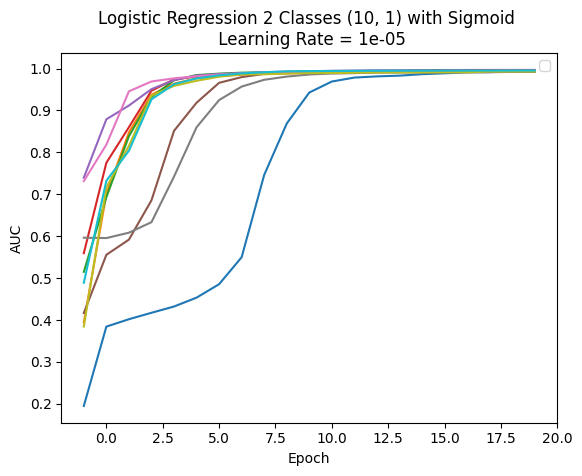


Test set: Avg. loss: 0.04111729300046806, AUC: 0.2549775370488655


Test set: Avg. loss: 0.050082220547441124, AUC: 0.45727002267729233


Test set: Avg. loss: 0.050018685698262406, AUC: 0.484177337282926


Test set: Avg. loss: 0.04910835321398749, AUC: 0.4961038139861878


Test set: Avg. loss: 0.04515236011449841, AUC: 0.5405576299014461


Test set: Avg. loss: 0.04651282292715511, AUC: 0.5447019157810805


Test set: Avg. loss: 0.020578080329342163, AUC: 0.8020345260703124


Test set: Avg. loss: 0.0053248960779320375, AUC: 0.9471906307202291


Test set: Avg. loss: 0.0032511591664505794, AUC: 0.9681183634625524


Test set: Avg. loss: 0.002369670918515997, AUC: 0.9774277348857348


Test set: Avg. loss: 0.0018414478309406257, AUC: 0.9828725356127799


Test set: Avg. loss: 0.0018774470927552407, AUC: 0.9825869260480211


Test set: Avg. loss: 0.0018157120138468457, AUC: 0.9827605423688125


Test set: Avg. loss: 0.0017161273067782385, AUC: 0.9838772596914345


Test set: Avg. loss: 0.00133528


Test set: Avg. loss: 0.0007488023235190729, AUC: 0.9934561650941173


Test set: Avg. loss: 0.0007149853568146194, AUC: 0.9939641535882849


Test set: Avg. loss: 0.0007473015637131211, AUC: 0.9938355489062172


Test set: Avg. loss: 0.0006418748918774212, AUC: 0.9952844949908477


Test set: Avg. loss: 0.0006581584057205706, AUC: 0.9952539513788565


Test set: Avg. loss: 0.000676886280747921, AUC: 0.9947625743227893


Test set: Avg. loss: 0.000679487134975923, AUC: 0.9947400685034273


Test set: Avg. loss: 0.02618508704207205, AUC: 0.4523267802103115


Test set: Avg. loss: 0.049330371754016444, AUC: 0.5198876423761001


Test set: Avg. loss: 0.01957737190136011, AUC: 0.8101017906058566


Test set: Avg. loss: 0.005594271310367939, AUC: 0.9456398725956283


Test set: Avg. loss: 0.0024979908952555054, AUC: 0.9755436762934416


Test set: Avg. loss: 0.0020728278789461027, AUC: 0.9800968178914835


Test set: Avg. loss: 0.0016568730706753938, AUC: 0.9843836406270764


Test set: Avg. loss: 0.0012

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0008309918222466858, AUC: 0.9928388626201918



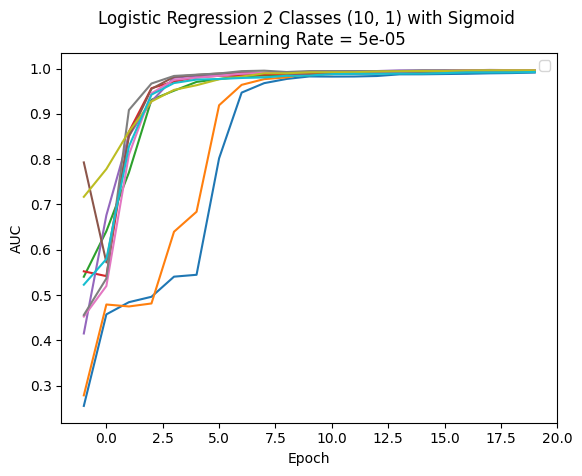


Test set: Avg. loss: 0.04909514196170783, AUC: 0.44392246423718135


Test set: Avg. loss: 0.04411500729389072, AUC: 0.436057216223052


Test set: Avg. loss: 0.021853178431035077, AUC: 0.47124238553111586


Test set: Avg. loss: 0.023255279098731884, AUC: 0.5649432210328671


Test set: Avg. loss: 0.02256773618931109, AUC: 0.6178152850951459


Test set: Avg. loss: 0.019929707173728547, AUC: 0.6651450232131452


Test set: Avg. loss: 0.016906701753351752, AUC: 0.7106271407321035


Test set: Avg. loss: 0.013544448414204284, AUC: 0.7567780025978145


Test set: Avg. loss: 0.010347184680757068, AUC: 0.8018962760370896


Test set: Avg. loss: 0.007673893656049456, AUC: 0.8433450292146968


Test set: Avg. loss: 0.006090463565249868, AUC: 0.8759966862860253


Test set: Avg. loss: 0.005196617009970465, AUC: 0.8991701782889576


Test set: Avg. loss: 0.004606153654015582, AUC: 0.9158485979946244


Test set: Avg. loss: 0.004126604052557462, AUC: 0.9283173577739386


Test set: Avg. loss: 0.003758317318


Test set: Avg. loss: 0.002148541049187228, AUC: 0.9737212407779726


Test set: Avg. loss: 0.002040106934296665, AUC: 0.9755243855911315


Test set: Avg. loss: 0.0019857833474319175, AUC: 0.9767659566259275


Test set: Avg. loss: 0.0018950216395020732, AUC: 0.9781372040484754


Test set: Avg. loss: 0.001865333466796401, AUC: 0.9790749465218863


Test set: Avg. loss: 0.04208055737102501, AUC: 0.36225741941844963


Test set: Avg. loss: 0.028642539899048105, AUC: 0.43348565843453807


Test set: Avg. loss: 0.030091012239949796, AUC: 0.4756513827146734


Test set: Avg. loss: 0.02952741145100406, AUC: 0.504867151363424


Test set: Avg. loss: 0.02827021695565486, AUC: 0.5327523974056149


Test set: Avg. loss: 0.026691607560183444, AUC: 0.5608182258555426


Test set: Avg. loss: 0.024923610884703958, AUC: 0.588245853570709


Test set: Avg. loss: 0.02306597968312771, AUC: 0.6154425287109953


Test set: Avg. loss: 0.020567672840063122, AUC: 0.6466650662528454


Test set: Avg. loss: 0.018229776781

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.002173466403538643, AUC: 0.9716925019183531


Test set: Avg. loss: 0.002099313906260899, AUC: 0.9733461437886082


Test set: Avg. loss: 0.0019463366726664036, AUC: 0.9755029514774536



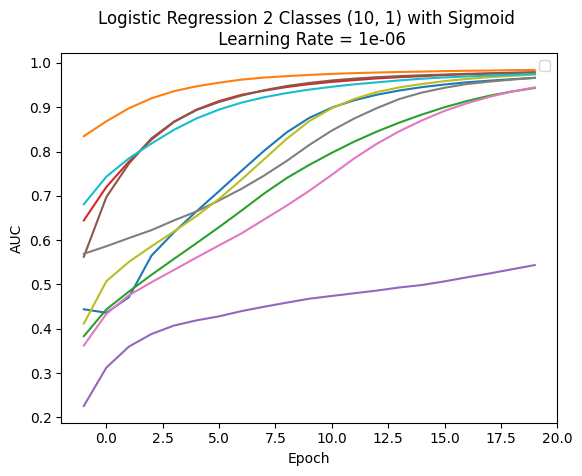


Test set: Avg. loss: 0.015085784051235665, AUC: 0.682896756161236


Test set: Avg. loss: 0.007710926527809159, AUC: 0.8605978831669332


Test set: Avg. loss: 0.004936402382070727, AUC: 0.9284320302821158


Test set: Avg. loss: 0.0033681239030375985, AUC: 0.9545387807418775


Test set: Avg. loss: 0.0025360512684097446, AUC: 0.968029411890789


Test set: Avg. loss: 0.001970999421046634, AUC: 0.9764567695361229


Test set: Avg. loss: 0.0017148717219785134, AUC: 0.980762882974026


Test set: Avg. loss: 0.001550481124447493, AUC: 0.9831276015655477


Test set: Avg. loss: 0.0013605978177941363, AUC: 0.9856059209595625


Test set: Avg. loss: 0.001223099867256038, AUC: 0.9876459127288628


Test set: Avg. loss: 0.0011011757280515587, AUC: 0.9891205797499067


Test set: Avg. loss: 0.0010446466459250597, AUC: 0.9899007814877847


Test set: Avg. loss: 0.0009935977357761706, AUC: 0.9905062951991872


Test set: Avg. loss: 0.0009703411263708743, AUC: 0.9909564115864246


Test set: Avg. loss: 0.00095


Test set: Avg. loss: 0.0009003568510091083, AUC: 0.9918496782739536


Test set: Avg. loss: 0.0009036454416456676, AUC: 0.9920077548623287


Test set: Avg. loss: 0.0009063700711505013, AUC: 0.9921347519858706


Test set: Avg. loss: 0.0009079976605085606, AUC: 0.9922387074372088


Test set: Avg. loss: 0.0009097197472925758, AUC: 0.9923083683066621


Test set: Avg. loss: 0.0008696841835728837, AUC: 0.9928104624195685


Test set: Avg. loss: 0.0008746622512059182, AUC: 0.9928747647606024


Test set: Avg. loss: 0.028943800284502174, AUC: 0.6150476051664788


Test set: Avg. loss: 0.009490034348229197, AUC: 0.8553824274562422


Test set: Avg. loss: 0.003575567873368352, AUC: 0.9478808091806596


Test set: Avg. loss: 0.0018890319280249238, AUC: 0.974423743853768


Test set: Avg. loss: 0.0012661601507392235, AUC: 0.98459905346954


Test set: Avg. loss: 0.0010680244699521589, AUC: 0.9881903392162831


Test set: Avg. loss: 0.0010253648210016098, AUC: 0.9895353298495754


Test set: Avg. loss: 0.00

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.0010412706845048544, AUC: 0.9912950705825364


Test set: Avg. loss: 0.0010279182568346738, AUC: 0.9914719020203796


Test set: Avg. loss: 0.0010150378226740267, AUC: 0.9916551636923263



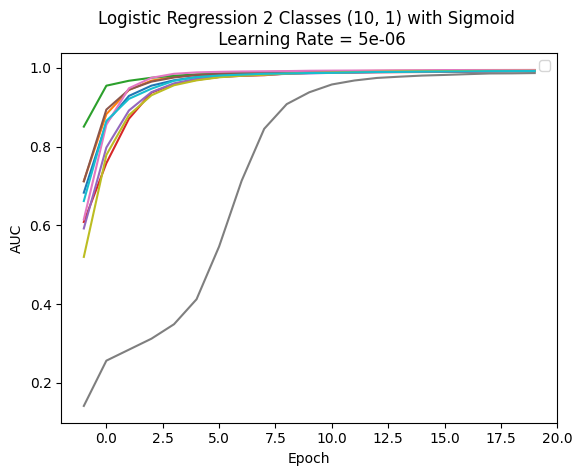

In [38]:
# SIGMOID 2 CLASS RATIO 

learning_rates = [1e-5, 5e-5, 1e-6, 5e-6]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_sigmoid(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()


Test set: Avg. loss: 0.025478993883784513, AUC: 0.5221457262520737


Test set: Avg. loss: 7.920568746562823, AUC: 0.914935504751943


Test set: Avg. loss: 3.76044023407172, AUC: 0.9674533700856937


Test set: Avg. loss: 4.473009571525621, AUC: 0.96551143938647


Test set: Avg. loss: 6.555489549972503, AUC: 0.9506758176042662


Test set: Avg. loss: 6.991317591064958, AUC: 0.9455509210238647


Test set: Avg. loss: 6.659288110199922, AUC: 0.9481176561368011


Test set: Avg. loss: 6.570627658757117, AUC: 0.9470909620916266


Test set: Avg. loss: 7.746765010351967, AUC: 0.9373373686624684


Test set: Avg. loss: 6.742079456400427, AUC: 0.9434975329335157


Test set: Avg. loss: 6.622166856722308, AUC: 0.9440108799561029


Test set: Avg. loss: 7.242771061804477, AUC: 0.9393907567528175


Test set: Avg. loss: 6.434774900321881, AUC: 0.9450375740012775


Test set: Avg. loss: 8.817905718248577, AUC: 0.9316905514140085


Test set: Avg. loss: 9.118322779179607, AUC: 0.9301505103462466


Test set: 


Test set: Avg. loss: 7.769698559620859, AUC: 0.9316905514140085


Test set: Avg. loss: 0.017277138080162537, AUC: 0.6266423889605741


Test set: Avg. loss: 199.04052633281574, AUC: 0.5


Test set: Avg. loss: 13.278853580324792, AUC: 0.8856993736951984


Test set: Avg. loss: 3.5135671169367884, AUC: 0.9690877212536384


Test set: Avg. loss: 3.104894286603908, AUC: 0.9721849506801045


Test set: Avg. loss: 4.991886494322594, AUC: 0.9563226348527263


Test set: Avg. loss: 4.283958671996312, AUC: 0.9650495342367098


Test set: Avg. loss: 4.1083495335549305, AUC: 0.9671029223270589


Test set: Avg. loss: 4.782983499530927, AUC: 0.9563312084981974


Test set: Avg. loss: 5.730495792491589, AUC: 0.9465776150690393


Test set: Avg. loss: 5.38028339520251, AUC: 0.9501710442271502


Test set: Avg. loss: 4.383486919521545, AUC: 0.9599246376563083


Test set: Avg. loss: 6.499742211762422, AUC: 0.9378507156850558


Test set: Avg. loss: 7.2004442550627585, AUC: 0.9337439395043577


Test set: Avg. lo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 9.900808393585015, AUC: 0.9311772043914214



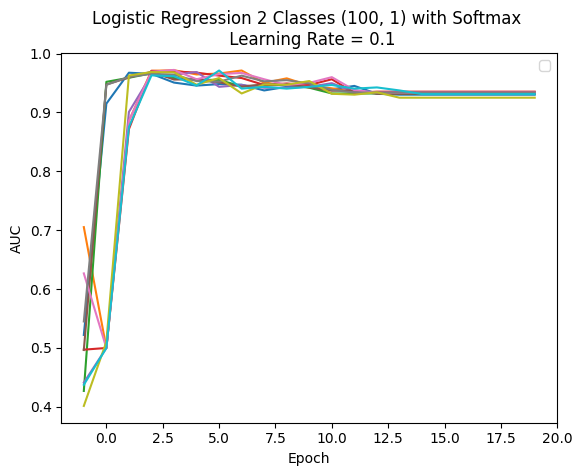


Test set: Avg. loss: 0.01732396585847527, AUC: 0.5927411230618203


Test set: Avg. loss: 13.357770647321429, AUC: 0.5


Test set: Avg. loss: 2.176046367510999, AUC: 0.842901878914405


Test set: Avg. loss: 0.5353427989635902, AUC: 0.9629361306280624


Test set: Avg. loss: 0.5614807413231512, AUC: 0.9603865428060684


Test set: Avg. loss: 0.7173288949528096, AUC: 0.9506672439587951


Test set: Avg. loss: 0.618690095826459, AUC: 0.9609341844105405


Test set: Avg. loss: 0.6687899129484505, AUC: 0.9553045144530229


Test set: Avg. loss: 0.8046517855879189, AUC: 0.941957491865754


Test set: Avg. loss: 0.7329399314232742, AUC: 0.9450375740012775


Test set: Avg. loss: 0.8300675101902174, AUC: 0.9404174507979921


Test set: Avg. loss: 0.801043461074987, AUC: 0.9404174507979921


Test set: Avg. loss: 0.8173624042645251, AUC: 0.9399041037754048


Test set: Avg. loss: 0.9088417511302245, AUC: 0.9342572865269448


Test set: Avg. loss: 0.9788348906775686, AUC: 0.9322038984365958


Test set: Avg


Test set: Avg. loss: 0.7088330507772063, AUC: 0.934770633549532


Test set: Avg. loss: 0.7088330507772063, AUC: 0.934770633549532


Test set: Avg. loss: 0.020671216597468216, AUC: 0.5098875566396455


Test set: Avg. loss: 17.486155760707817, AUC: 0.5


Test set: Avg. loss: 1.516111385748253, AUC: 0.8778791373197926


Test set: Avg. loss: 0.3751256559699712, AUC: 0.9670343331632892


Test set: Avg. loss: 0.3907457829508969, AUC: 0.967060054099703


Test set: Avg. loss: 0.363963480568327, AUC: 0.9717144718848733


Test set: Avg. loss: 0.702969663631842, AUC: 0.9414441448431666


Test set: Avg. loss: 0.5704934572334368, AUC: 0.953764473385261


Test set: Avg. loss: 0.6717839685286054, AUC: 0.9424708388883412


Test set: Avg. loss: 0.674889874507675, AUC: 0.9409307978205793


Test set: Avg. loss: 0.6563530837033352, AUC: 0.941957491865754


Test set: Avg. loss: 0.5854362503588817, AUC: 0.9491443501819756


Test set: Avg. loss: 0.5605886550176711, AUC: 0.951711085294912


Test set: Avg. lo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.7704876569980914, AUC: 0.9322038984365958



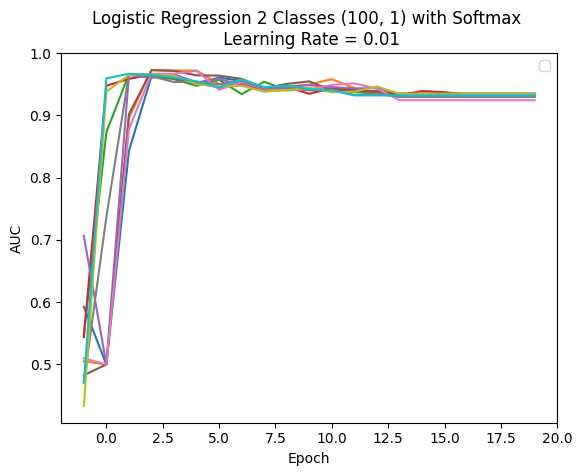


Test set: Avg. loss: 0.019426060512692786, AUC: 0.5994146343554547


Test set: Avg. loss: 0.5635300788326539, AUC: 0.622651356993737


Test set: Avg. loss: 0.04574758221644052, AUC: 0.9643990088865835


Test set: Avg. loss: 0.055563407408277934, AUC: 0.9598731957834811


Test set: Avg. loss: 0.052087498500974036, AUC: 0.961960878455715


Test set: Avg. loss: 0.06699888059564753, AUC: 0.9486310031593884


Test set: Avg. loss: 0.06400522386065181, AUC: 0.9511977382723247


Test set: Avg. loss: 0.05918845972412615, AUC: 0.9542778204078484


Test set: Avg. loss: 0.08294437834935159, AUC: 0.9363106746172939


Test set: Avg. loss: 0.07289247730010291, AUC: 0.9409307978205793


Test set: Avg. loss: 0.06755293180730279, AUC: 0.9450375740012775


Test set: Avg. loss: 0.07396235179703675, AUC: 0.9388774097302303


Test set: Avg. loss: 0.07904988243466332, AUC: 0.9352839805721194


Test set: Avg. loss: 0.06932238861147168, AUC: 0.9414441448431666


Test set: Avg. loss: 0.08323568340167249, AUC: 


Test set: Avg. loss: 0.07793324630452979, AUC: 0.9322038984365958


Test set: Avg. loss: 0.07793324630452979, AUC: 0.9322038984365958


Test set: Avg. loss: 0.07793324630452979, AUC: 0.9322038984365958


Test set: Avg. loss: 0.07793324630452979, AUC: 0.9322038984365958


Test set: Avg. loss: 0.07793324630452979, AUC: 0.9322038984365958


Test set: Avg. loss: 0.016255437957574122, AUC: 0.548742246209377


Test set: Avg. loss: 1.8577220592933166, AUC: 0.5


Test set: Avg. loss: 0.04953667737435603, AUC: 0.9648609140363437


Test set: Avg. loss: 0.06704375265054327, AUC: 0.9568016872934287


Test set: Avg. loss: 0.07136133047858134, AUC: 0.956314061207255


Test set: Avg. loss: 0.07587744829323968, AUC: 0.9511891646268535


Test set: Avg. loss: 0.07100545397456388, AUC: 0.9547911674304357


Test set: Avg. loss: 0.08627985525822295, AUC: 0.9414441448431666


Test set: Avg. loss: 0.09509019279085085, AUC: 0.9357973275947067


Test set: Avg. loss: 0.08769433987066612, AUC: 0.940417450797992

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.08075557732434006, AUC: 0.932717245459183



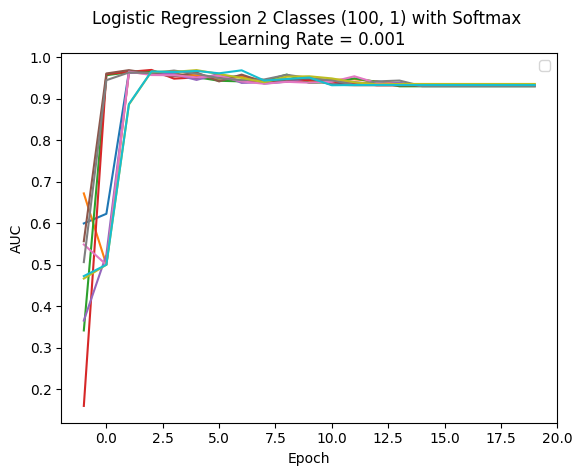


Test set: Avg. loss: 0.044179312190654116, AUC: 0.34264359784458553


Test set: Avg. loss: 0.0036272775559198288, AUC: 0.9527538549253449


Test set: Avg. loss: 0.003464291184585287, AUC: 0.9690105584443978


Test set: Avg. loss: 0.00384573339181904, AUC: 0.9655028657409986


Test set: Avg. loss: 0.005107966515835274, AUC: 0.9614561050785989


Test set: Avg. loss: 0.00632776705621439, AUC: 0.9501710442271502


Test set: Avg. loss: 0.0065416805986045065, AUC: 0.9476043091142139


Test set: Avg. loss: 0.0053173881139814486, AUC: 0.9568445555207848


Test set: Avg. loss: 0.007244962342777607, AUC: 0.9388774097302303


Test set: Avg. loss: 0.007456100752141412, AUC: 0.9373373686624684


Test set: Avg. loss: 0.006826221572686426, AUC: 0.9399041037754048


Test set: Avg. loss: 0.007712064322477542, AUC: 0.932717245459183


Test set: Avg. loss: 0.006050495750909019, AUC: 0.9465776150690393


Test set: Avg. loss: 0.007847287393257978, AUC: 0.9322038984365958


Test set: Avg. loss: 0.008138626


Test set: Avg. loss: 0.00787045299143031, AUC: 0.9342658601724161


Test set: Avg. loss: 0.007854016424459454, AUC: 0.9342658601724161


Test set: Avg. loss: 0.007843024735618575, AUC: 0.9342658601724161


Test set: Avg. loss: 0.007834532246086169, AUC: 0.9342658601724161


Test set: Avg. loss: 0.007827551468558933, AUC: 0.9342658601724161


Test set: Avg. loss: 0.032202204315311914, AUC: 0.4859317194874675


Test set: Avg. loss: 0.12276893915843766, AUC: 0.5


Test set: Avg. loss: 0.02610590048211455, AUC: 0.8220336258375379


Test set: Avg. loss: 0.005464157209139679, AUC: 0.9629018360461777


Test set: Avg. loss: 0.007043903658849112, AUC: 0.9578369549840744


Test set: Avg. loss: 0.006818780864494434, AUC: 0.9588722226747202


Test set: Avg. loss: 0.007054306705545935, AUC: 0.9568274082298424


Test set: Avg. loss: 0.007877790409585705, AUC: 0.9506843912497375


Test set: Avg. loss: 0.0070882306335875705, AUC: 0.9552959408075518


Test set: Avg. loss: 0.007755417261064422, AUC: 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.009296052944586145, AUC: 0.9291238163010722


Test set: Avg. loss: 0.009301113539354155, AUC: 0.9291238163010722



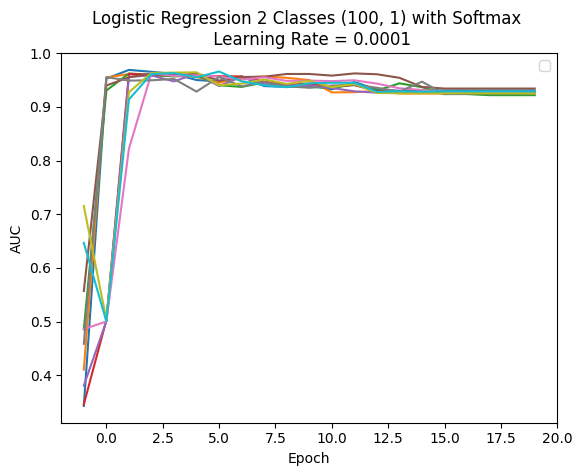


Test set: Avg. loss: 0.02317988255502768, AUC: 0.3991332044428631


Test set: Avg. loss: 0.014251613222047162, AUC: 0.6388244674694457


Test set: Avg. loss: 0.00445678712911981, AUC: 0.8269666871005217


Test set: Avg. loss: 0.002975027445186986, AUC: 0.8903827275338337


Test set: Avg. loss: 0.003624344217604485, AUC: 0.8843940361722101


Test set: Avg. loss: 0.0036346160847207775, AUC: 0.8859683718218568


Test set: Avg. loss: 0.003953045692996702, AUC: 0.8834102103543916


Test set: Avg. loss: 0.0041222031812490146, AUC: 0.8793034341736935


Test set: Avg. loss: 0.004182419298104864, AUC: 0.8813653959095138


Test set: Avg. loss: 0.004034001141107847, AUC: 0.8844626253359797


Test set: Avg. loss: 0.003867847578866141, AUC: 0.8875427074715034


Test set: Avg. loss: 0.0037449218224788056, AUC: 0.890622789607027


Test set: Avg. loss: 0.0035682845066299595, AUC: 0.8947295657877251


Test set: Avg. loss: 0.0035247581839314653, AUC: 0.896269606855487


Test set: Avg. loss: 0.003603737


Test set: Avg. loss: 0.0026760245085256196, AUC: 0.9234769990526122


Test set: Avg. loss: 0.0026716140116223638, AUC: 0.9239903460751995


Test set: Avg. loss: 0.0026513523813607035, AUC: 0.9234769990526122


Test set: Avg. loss: 0.0026364915119194837, AUC: 0.9245036930977868


Test set: Avg. loss: 0.0026427392016780057, AUC: 0.9245036930977868


Test set: Avg. loss: 0.03340720439302749, AUC: 0.34966541348548696


Test set: Avg. loss: 0.02235778666431119, AUC: 0.5339291302465352


Test set: Avg. loss: 0.006766402696724017, AUC: 0.7703002490644009


Test set: Avg. loss: 0.0038033311658270856, AUC: 0.8576989192919884


Test set: Avg. loss: 0.003321825717546925, AUC: 0.8836920689492568


Test set: Avg. loss: 0.0030357382312324478, AUC: 0.8976724695957098


Test set: Avg. loss: 0.0031138135286098187, AUC: 0.8977239114685369


Test set: Avg. loss: 0.0029844171512200964, AUC: 0.8992725261817698


Test set: Avg. loss: 0.002979176878682328, AUC: 0.9008211408950029


Test set: Avg. loss: 0.00

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.002081510751637366, AUC: 0.9393993303982887



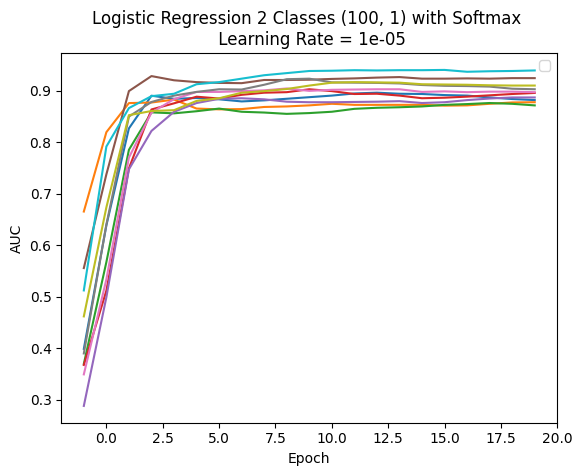


Test set: Avg. loss: 0.024569296195146705, AUC: 0.38751055630098635


Test set: Avg. loss: 0.04261353494711297, AUC: 0.4951826829508773


Test set: Avg. loss: 0.040185649942907485, AUC: 0.5003761686950482


Test set: Avg. loss: 0.036375847415647644, AUC: 0.5070496799886828


Test set: Avg. loss: 0.032466064081922576, AUC: 0.5142451119503758


Test set: Avg. loss: 0.028697066178726607, AUC: 0.5239901317340626


Test set: Avg. loss: 0.025299101882839795, AUC: 0.5373200070303894


Test set: Avg. loss: 0.022462459824840474, AUC: 0.5573576882022352


Test set: Avg. loss: 0.019839963063937042, AUC: 0.5748029133247311


Test set: Avg. loss: 0.017651826451777423, AUC: 0.5943186738285184


Test set: Avg. loss: 0.015866261831721903, AUC: 0.6128077402871314


Test set: Avg. loss: 0.014275065119962514, AUC: 0.6323149271454477


Test set: Avg. loss: 0.012873234956160835, AUC: 0.6533535814260545


Test set: Avg. loss: 0.011708807007372996, AUC: 0.6749141563747199


Test set: Avg. loss: 0.0108319646


Test set: Avg. loss: 0.008942771895825246, AUC: 0.7683947563584299


Test set: Avg. loss: 0.008656291240984363, AUC: 0.7760949616972389


Test set: Avg. loss: 0.008427301302212859, AUC: 0.7827684729908733


Test set: Avg. loss: 0.008234527293692957, AUC: 0.7894419842845078


Test set: Avg. loss: 0.008068611656410107, AUC: 0.7930354134426186


Test set: Avg. loss: 0.04978211325888308, AUC: 0.4981598813407467


Test set: Avg. loss: 0.05067729160158777, AUC: 0.5013428472219245


Test set: Avg. loss: 0.04570521676515694, AUC: 0.508016358515559


Test set: Avg. loss: 0.040837609743232806, AUC: 0.5203795552850095


Test set: Avg. loss: 0.036389127774761824, AUC: 0.5270787875150574


Test set: Avg. loss: 0.03263101617248409, AUC: 0.5383724220119773


Test set: Avg. loss: 0.029308226291190516, AUC: 0.5506670296176583


Test set: Avg. loss: 0.026319465281800455, AUC: 0.5609339700694036


Test set: Avg. loss: 0.023756113111602594, AUC: 0.5768563014150803


Test set: Avg. loss: 0.021462475044139

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.011235167027507017, AUC: 0.6969880783459722


Test set: Avg. loss: 0.010469685923732338, AUC: 0.7082817128428923



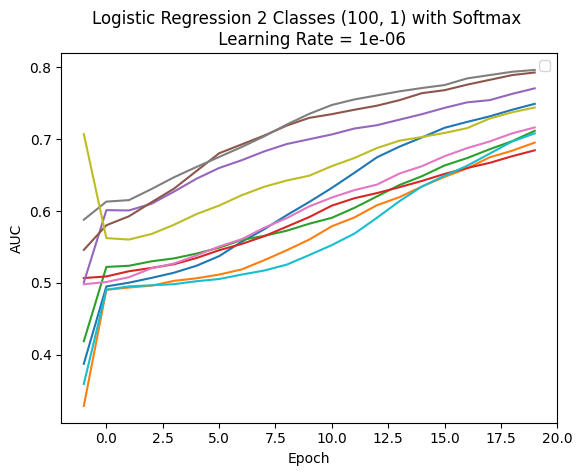


Test set: Avg. loss: 0.03288640047946085, AUC: 0.43210315810230937


Test set: Avg. loss: 0.02365985321455614, AUC: 0.44452744209574185


Test set: Avg. loss: 0.029018374456875565, AUC: 0.4922204884405825


Test set: Avg. loss: 0.03210541130839915, AUC: 0.5044818731700625


Test set: Avg. loss: 0.034112127671330615, AUC: 0.5072200811924226


Test set: Avg. loss: 0.03551680997291707, AUC: 0.5073229649380769


Test set: Avg. loss: 0.036491559899371605, AUC: 0.5073829804563751


Test set: Avg. loss: 0.03715195073350863, AUC: 0.5069039280156726


Test set: Avg. loss: 0.037619130705207525, AUC: 0.507973490288203


Test set: Avg. loss: 0.03795743235396549, AUC: 0.5095563995833208


Test set: Avg. loss: 0.03819818476959292, AUC: 0.509564973228792


Test set: Avg. loss: 0.03834630835870778, AUC: 0.509564973228792


Test set: Avg. loss: 0.03840569877229615, AUC: 0.509564973228792


Test set: Avg. loss: 0.03838841416574166, AUC: 0.5100783202513792


Test set: Avg. loss: 0.038309328304314466, AU


Test set: Avg. loss: 0.016946228394597213, AUC: 0.642077094220077


Test set: Avg. loss: 0.01702279037570361, AUC: 0.6389970120845534


Test set: Avg. loss: 0.01708102867963645, AUC: 0.6405627740887287


Test set: Avg. loss: 0.01712021225481053, AUC: 0.6405627740887287


Test set: Avg. loss: 0.036961537710628156, AUC: 0.47279903803697815


Test set: Avg. loss: 0.04079072964117394, AUC: 0.47975547963116183


Test set: Avg. loss: 0.04306441162930759, AUC: 0.48089363106746175


Test set: Avg. loss: 0.04464964738296919, AUC: 0.48462423855311165


Test set: Avg. loss: 0.045764992202537644, AUC: 0.4883034041659343


Test set: Avg. loss: 0.046579116126271754, AUC: 0.4898691661701097


Test set: Avg. loss: 0.047194419687085515, AUC: 0.49195684884234353


Test set: Avg. loss: 0.047668474801578875, AUC: 0.49404453151457733


Test set: Avg. loss: 0.04802305802055027, AUC: 0.49508837285069424


Test set: Avg. loss: 0.04828053823909404, AUC: 0.4950969464961654


Test set: Avg. loss: 0.048451139319

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.03469190834471898, AUC: 0.5219024490618288



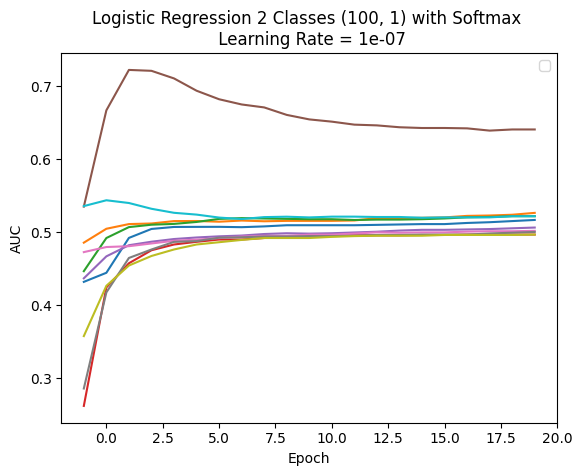


Test set: Avg. loss: 0.027508916321748532, AUC: 0.42416396239599097


Test set: Avg. loss: 0.0280459869969212, AUC: 0.42902414767246955


Test set: Avg. loss: 0.02858668775538727, AUC: 0.43592057374835486


Test set: Avg. loss: 0.029137016083142772, AUC: 0.43865878177071504


Test set: Avg. loss: 0.02968689126751191, AUC: 0.4449818453057148


Test set: Avg. loss: 0.03024258426010732, AUC: 0.45084300369095437


Test set: Avg. loss: 0.030796350159260057, AUC: 0.4602804439433625


Test set: Avg. loss: 0.0313414668444521, AUC: 0.46194908969319215


Test set: Avg. loss: 0.031870001838320776, AUC: 0.4646187085517827


Test set: Avg. loss: 0.03237786993970535, AUC: 0.4662444860742564


Test set: Avg. loss: 0.032864531128056054, AUC: 0.4709760666686672


Test set: Avg. loss: 0.033330556028377936, AUC: 0.4710275085414943


Test set: Avg. loss: 0.03377377567330749, AUC: 0.47159229743690867


Test set: Avg. loss: 0.034195262206020316, AUC: 0.4716437393097358


Test set: Avg. loss: 0.034596761067


Test set: Avg. loss: 0.015913666652102896, AUC: 0.6011958092020937


Test set: Avg. loss: 0.0162149221013545, AUC: 0.6012472510749208


Test set: Avg. loss: 0.016502613853470387, AUC: 0.6002719989025733


Test set: Avg. loss: 0.016777739514968904, AUC: 0.6003234407754006


Test set: Avg. loss: 0.01704073643338853, AUC: 0.598800546998581


Test set: Avg. loss: 0.017292054296773905, AUC: 0.5977824265988777


Test set: Avg. loss: 0.043522341157585444, AUC: 0.23448491681420477


Test set: Avg. loss: 0.04325978652290676, AUC: 0.24306713593086215


Test set: Avg. loss: 0.043252390117131896, AUC: 0.25632092012363195


Test set: Avg. loss: 0.04345384838665001, AUC: 0.2701223459208738


Test set: Avg. loss: 0.043841460723561036, AUC: 0.28438567686787586


Test set: Avg. loss: 0.04434890628601453, AUC: 0.29909376567369567


Test set: Avg. loss: 0.04490804178620964, AUC: 0.31012268886669264


Test set: Avg. loss: 0.045481727236793154, AUC: 0.3201077707235728


Test set: Avg. loss: 0.046055781915

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Test set: Avg. loss: 0.04340685968813689, AUC: 0.45762904408139815


Test set: Avg. loss: 0.04394555733564231, AUC: 0.4581852593313414


Test set: Avg. loss: 0.04446333338261638, AUC: 0.45720143351352277



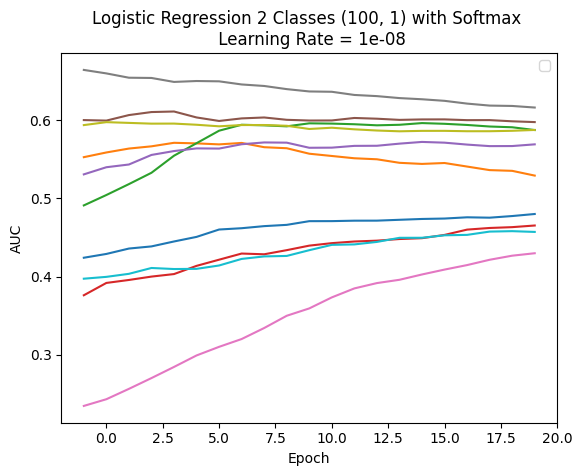

In [14]:
# SOFTMAX 2 CLASS RATIO 

learning_rates = [0.1, 0.01, 0.001, 0.0001, 1e-5, 1e-6, 1e-7, 1e-8]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SoftmaxLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_softmax(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_softmax(epoch, train_loader_reduced_ratio, network, optimizer, verbose=False)
            _, auc = metric_utils.auc_softmax(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes " + str(ratio) + " with Softmax \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()

In [1]:
# SIGMOID 2 CLASS 

learning_rates = [0.1, 0.01, 0.0001, 0.00001, 1e-6, 1e-7]

for learning_rate in learning_rates:
    aucs = []
    for i in range(10):
        model_aucs = []
        network = models.SigmoidLogisticRegression(NUM_CLASSES_REDUCED)
        optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)
        _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network) 
        model_aucs.append(auc)
        for epoch in range(n_epochs):
            _, _ = train.train_sigmoid(epoch, train_loader_reduced,  network, optimizer, verbose=False)
            _, auc = metric_utils.auc_sigmoid(test_loader_reduced, network)
            model_aucs.append(auc)
        aucs.append(model_aucs)
        plt.plot(np.arange(-1, n_epochs), aucs[i])
    plt.title("Logistic Regression 2 Classes with Sigmoid \n Learning Rate = " + str(learning_rate))
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()

NameError: name 'models' is not defined